In [2]:
# Imports
!pip install xarray netcdf4 matplotlib seaborn pandas

import xarray as xr
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date

# Phase 1: Preparing the Raw AirNow Data

In [ ]:
# Get all the filenames for the files we want
DATA_DIR = "./"## Insert relevant filepath here ##

city = 'Bamako'
data = {}
indices = []
filename = f'{city}_PM2.5_20*_YTD.csv'
all_filenames = glob.glob(f'{DATA_DIR}/{filename}')
all_filenames


In [ ]:
#Combine all files in the list
combined_an = pd.concat([pd.read_csv(f,index_col=0, parse_dates=True, date_format='%Y-%m-%d %I:%M %p') for f in all_filenames ])

combined_an

In [ ]:
# find col names
combined_an.columns

In [ ]:
# Clean the data

## --- Create a CleanData Function Here ---- ##
def CleanData(df):
    # drop rows that are not valid using QC name
    df = df[df['QC Name'] == 'Valid']

    return df



In [ ]:
# Make relevant plots below
cleaned_data = CleanData(combined_an)
cleaned_data.plot(y='Raw Conc.', figsize=(15,5))
# time series plot

In [ ]:
cleaned_data['Raw Conc.'].hist()

In [ ]:
#

## ---- Consider filtering out outliers ---- ##

# def FilterOutliers():

#  return


In [ ]:
daily_airnow

# Phase 2: Evaluating the Datasets

In [3]:
# Import the compiled data

DATA_DIR = "./"# Insert relevant filepath here
an_filename = 'compiled_data_Bamako.csv'
compiled_pm = pd.read_csv(f'{DATA_DIR}/{an_filename}', index_col=0, parse_dates=True)
compiled_pm

,WUSTL,AirNow,MERRA-2
Date,,,
2019-10-10,22.125806,0.547619,21.083926
2019-10-11,22.206451,1.325000,31.661477
2019-10-13,22.367742,0.240000,10.892543
2019-10-14,22.448387,0.277778,16.271809
2019-10-15,22.529032,0.285000,36.037282
...,...,...,...
2020-12-26,19.200001,73.825000,58.681095
2020-12-27,19.200001,67.404167,52.497246
2020-12-28,19.200001,46.758333,44.774349


In [4]:
compiled_pm.columns

Index(['WUSTL', 'AirNow', 'MERRA-2'], dtype='object')

In [7]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

<Axes: xlabel='Date'>

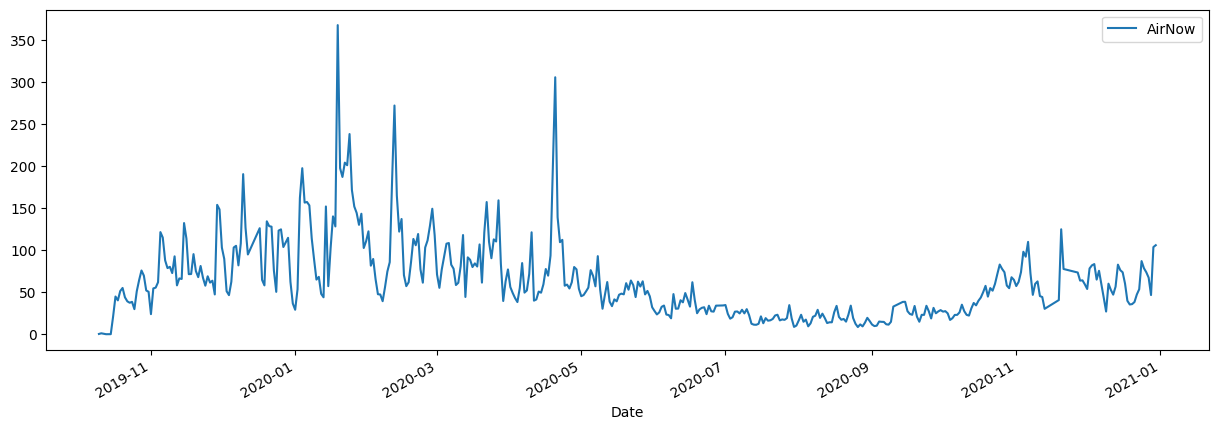

In [9]:
compiled_pm.plot(y='AirNow', figsize=(15,5))

<Axes: xlabel='AirNow', ylabel='MERRA-2'>

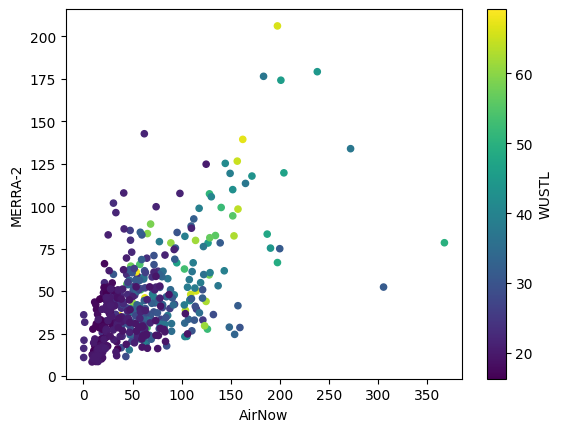

In [6]:
## ----  Make Scatter Plot ---- ##
compiled_pm.plot.scatter(x='AirNow', y='MERRA-2', c='WUSTL')



In [ ]:
## -- Time-series plots -- ##

# Daily data - compiled_pm
# Monhtly data - compiled_pm_monthly



In [ ]:
## -- Compare Distributions -- ##

In [ ]:
## -- Compute the error statistics -- ##



# Phase 3: Developing the Bias-Correction

In [ ]:
## -- Be creative and try bias-correcting to make improvements -- ##

In [ ]:
# Example usage:
#if __name__ == "__main__":
# This is example code - you'll use your actual 'compiled_pm' dataframe

# Apply quantile mapping:
corrected_df, qm_models = quantile_mapping_bias_correction(compiled_pm, n_quantiles=100)

# Create visualizations:
#plot_quantile_mapping_results(compiled_pm, corrected_df, qm_models)
#plot_distribution_comparison(corrected_df, qm_models)

# Access corrected data:
#merra2_corrected = corrected_df['MERRA-2_QM_corrected']
#wustl_corrected = corrected_df['WUSTL_QM_corrected']

